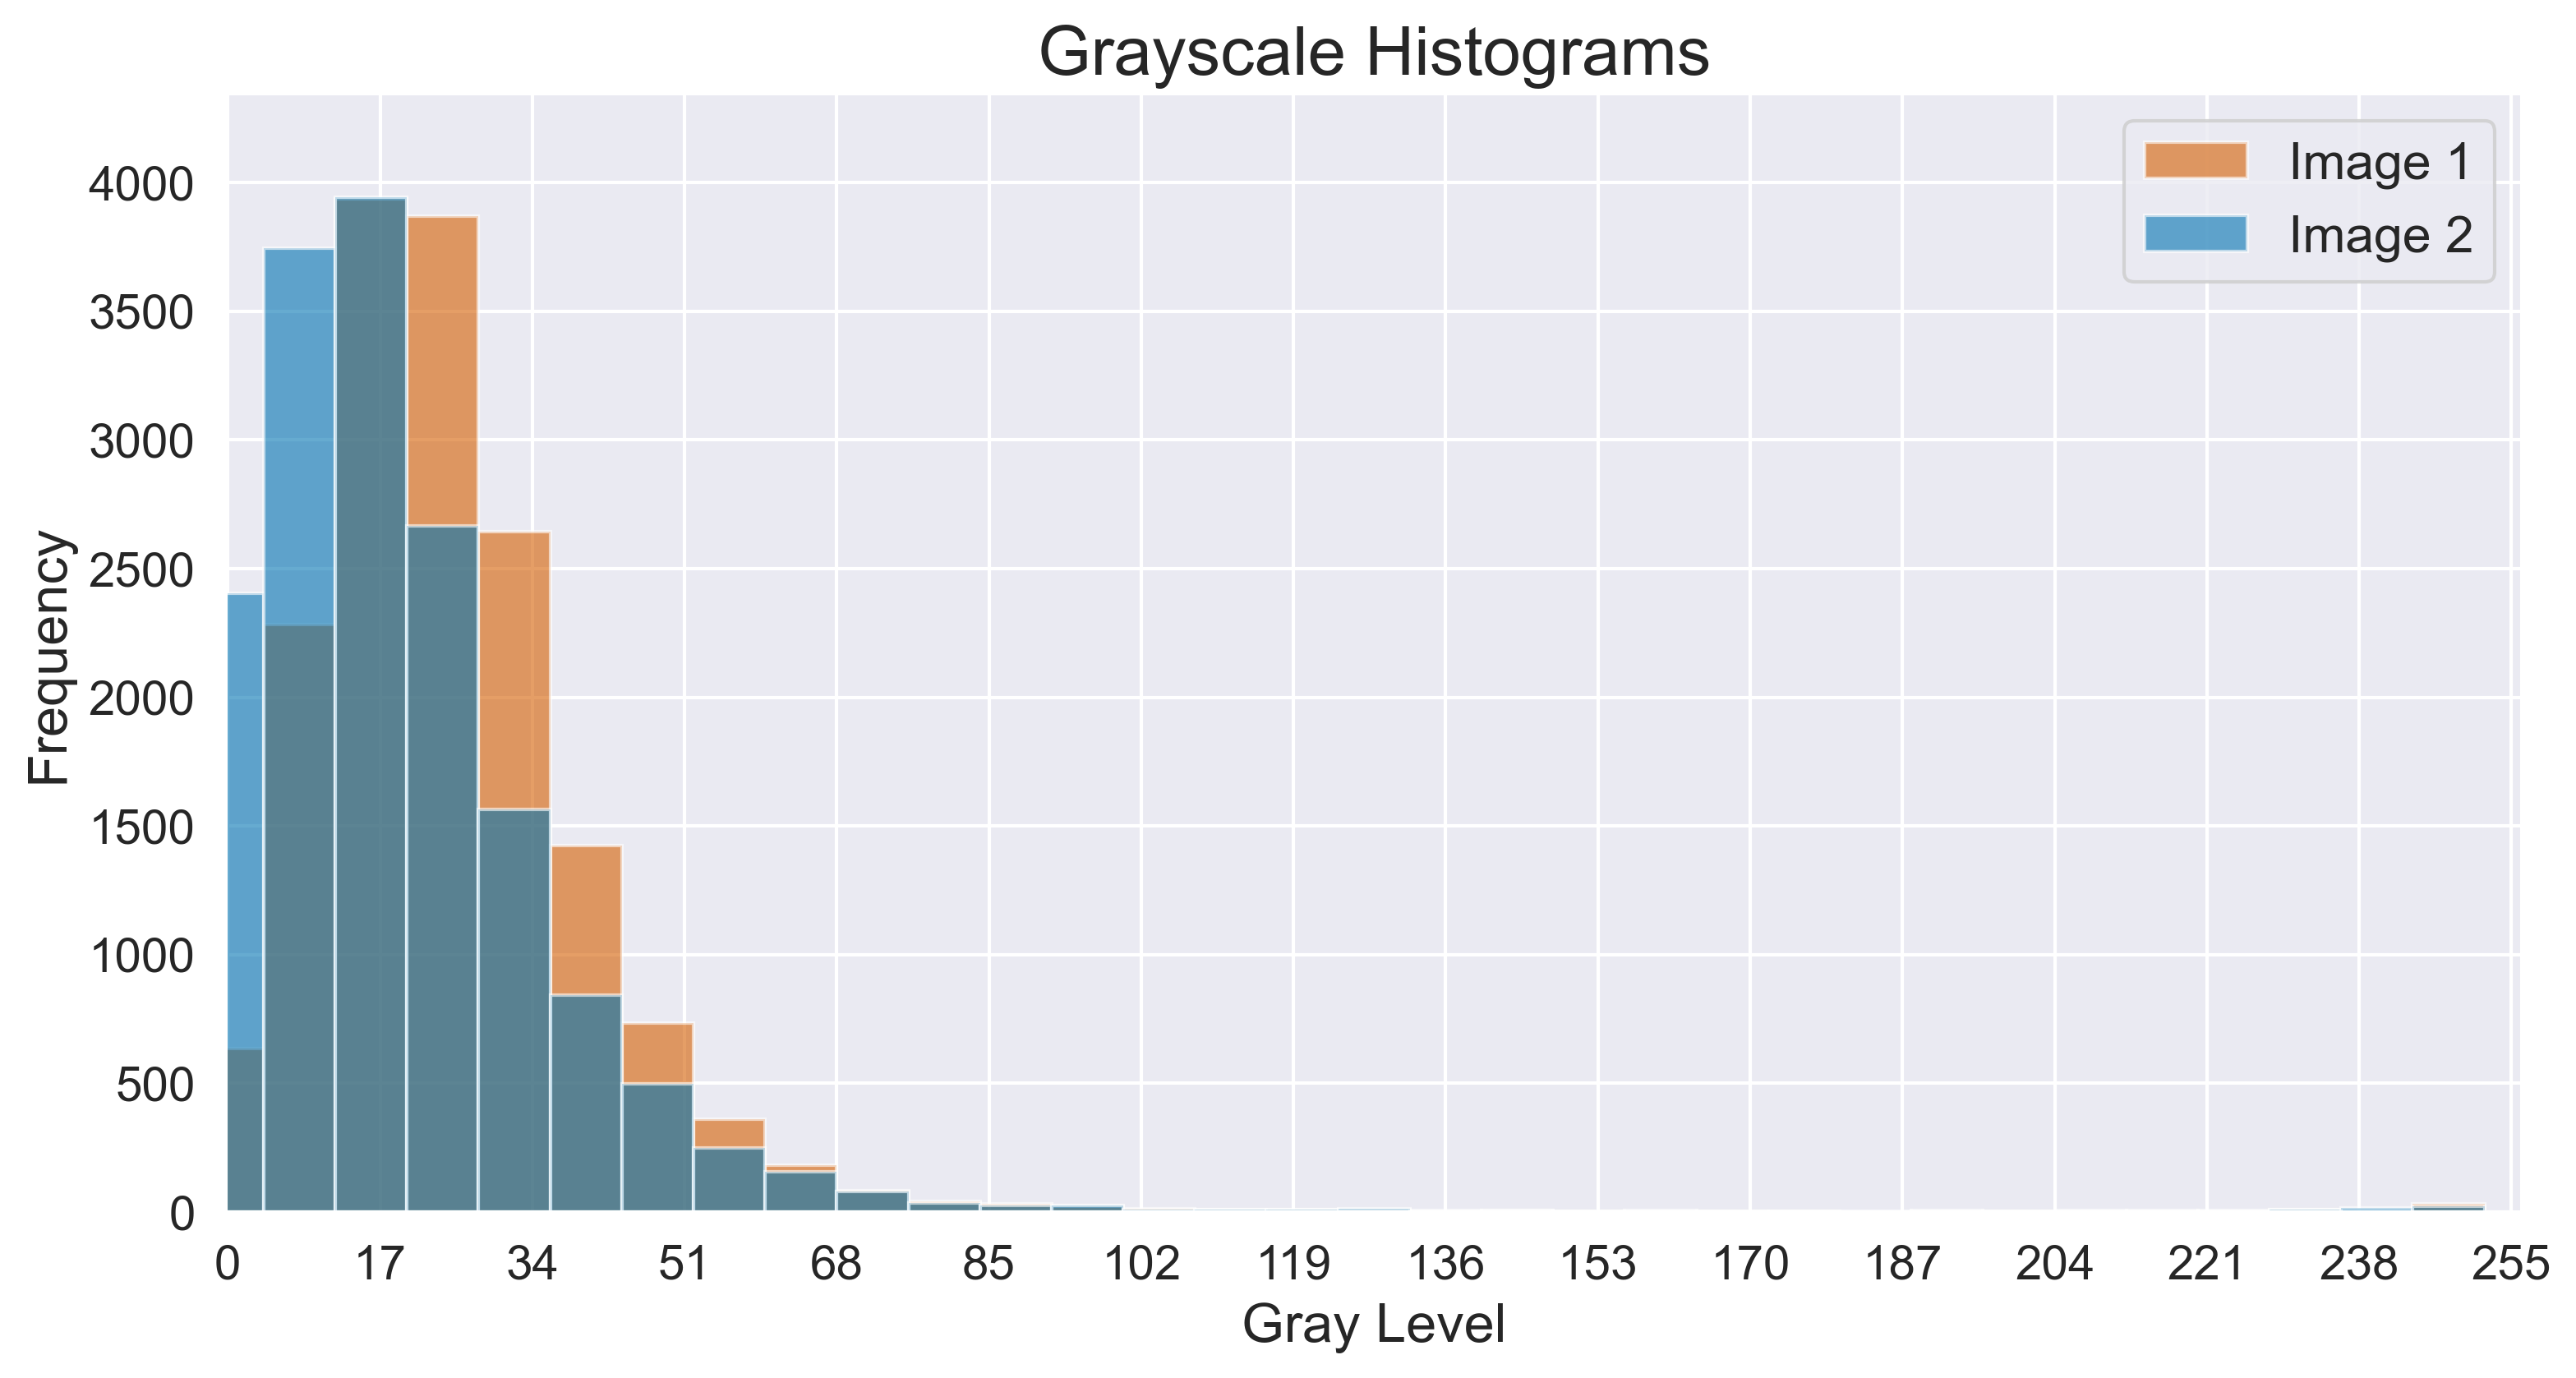

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_combined_histogram(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    combined_hist = np.array([np.sum(hist[i:i+8]) for i in range(0, 256, 8)])
    return combined_hist

image_path1 = "savetest/real_2S1.jpeg"
image_path2 = "savetest/fake_2S1_1.jpeg"

combined_hist1 = get_combined_histogram(image_path1)
combined_hist2 = get_combined_histogram(image_path2)

sns.set(style="darkgrid", palette="colorblind", color_codes=True)
plt.figure(figsize=(12, 6))
plt.rcParams['figure.dpi'] = 300

plt.bar(range(0, 256, 8), combined_hist1.ravel(), width=8, color='r', alpha=0.6, label='Image 1')
plt.bar(range(0, 256, 8), combined_hist2.ravel(), width=8, color='b', alpha=0.6, label='Image 2')

plt.title('Grayscale Histograms', fontsize=20)
plt.xlabel('Gray Level', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.xticks(range(0, 256, 17), fontsize=14)
plt.xlim([0, 256])

y_max = max(combined_hist1.max(), combined_hist2.max()) * 1.1
plt.yticks(fontsize=14)
plt.ylim([0, y_max])

sns.despine(trim=True, left=True)

plt.legend(fontsize=15)
plt.show()